In [1]:
import wave
import math
import contextlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import librosa.display
from scipy.signal import stft
%matplotlib inline  

noise_file = 'C://Users//Muhammad//Desktop//REU19//Summer Research Prep Work//Background Material//Lecture 5 - Signal Processing Part IV//Assignment//noise_file.wav'
speech_file_1 = 'C://Users//Muhammad//Desktop//REU19//Summer Research Prep Work//Background Material//Lecture 5 - Signal Processing Part IV//Assignment//speech_file_1.wav'

audio_files = {0: noise_file,
               1: speech_file_1
               }

In [2]:
freq, sig = wav.read(audio_files[1])
nframes = sig.size
length = nframes / freq
time_vec, spacing = np.linspace(0, length, num = nframes, retstep = True)
fft_sig = np.fft.fft(sig)

In [3]:
mag_spec = np.abs(fft_sig)
mag_spec[2:-2] = 2 * mag_spec[2:-2]
freqs = freq * np.linspace(0, nframes//2, num = nframes//2)
phase_spec = np.angle(fft_sig)

In [4]:
sample_frequencies, segment_time, stft_sig = stft(sig)
print("f:",np.shape(sample_frequencies),
      "t",np.shape(segment_time),
      "stft", np.shape(stft_sig))

f: (129,) t (384,) stft (129, 384)


In [5]:
sample_params = {"signal"   : sig,      # time-domain audio signal
                 "freq"     : freq,     # frequency of sample
                 "fft_sig"  : fft_sig,  # frequency-domain audio signal
                 "nframes"  : nframes,  # number of frames
                 "length"   : length,   # length of track in seconds
                 "time_vec" : time_vec, # time vector
                 "stft_sig" : stft_sig  # short-time fourier
                 } 

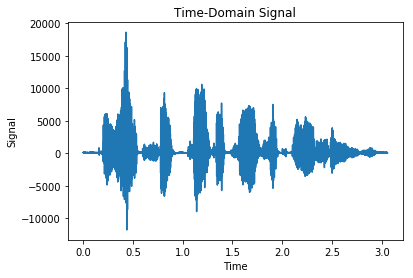

In [6]:
# plot speech_file_1 wrt time
plt.plot(time_vec, sig)
plt.title("Time-Domain Signal")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.show()

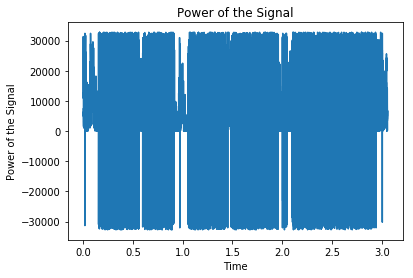

In [7]:
# power of the signal P[n] = x^2[n]
plt.plot(time_vec, sig ** 2)
plt.title("Power of the Signal")
plt.xlabel("Time")
plt.ylabel("Power of the Signal")
plt.show()

In [8]:
# energy of the signal
E = sample_params["signal"] ** 2
print(E)

[12769 22201 18496 ...   841   676   400]


C:\Users\Muhammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Muhammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


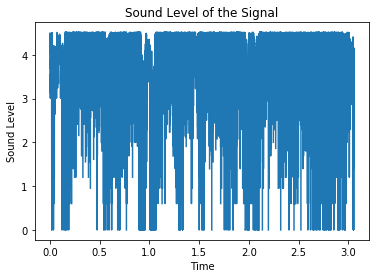

In [9]:
# sound level of the signal
time = sample_params["time_vec"]
SL = np.log10(E)
plt.plot(time, SL)
plt.title("Sound Level of the Signal")
plt.xlabel("Time")
plt.ylabel("Sound Level")
plt.show()

## Plot noise_file wrt time

In [10]:
freq, sig = wav.read(audio_files[0])
nframes = sig.size
length = nframes / freq
time_vec, spacing = np.linspace(0, length, num = nframes, retstep = True)
fft_sig = np.fft.fft(sig)

In [11]:
mag_spec = np.abs(fft_sig)
mag_spec[2:-2] = 2 * mag_spec[2:-2]
freqs = freq * np.linspace(0, nframes//2, num = nframes//2)
phase_spec = np.angle(fft_sig)

In [12]:
sample_frequencies, segment_time, stft_sig = stft(sig)
print("f:",np.shape(sample_frequencies),
      "t",np.shape(segment_time),
      "stft", np.shape(stft_sig))

f: (129,) t (384,) stft (129, 384)


In [13]:
noise_params = {"signal":sig, # time-domain audio signal
                 "freq": freq, # frequency of sample
                 "fft_sig":fft_sig, # frequency-domain audio signal
                 "nframes":nframes, # number of frames
                 "length":length, # length of track in seconds
                 "time_vec":time_vec, # time vector
                 "stft_sig":stft_sig # short-time fourier
                 } 

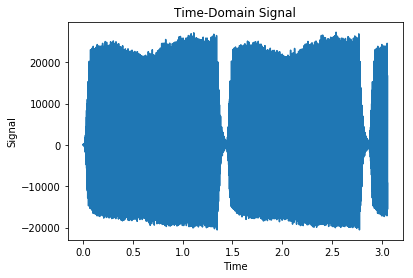

In [14]:
plt.plot(time_vec, sig)
plt.title("Time-Domain Signal")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.show()

Text(0.5, 1.0, 'Noise Power Signal')

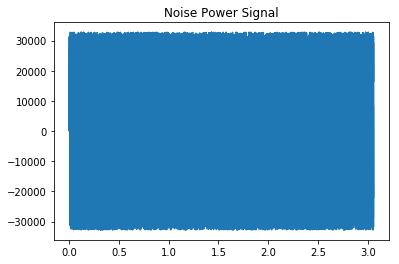

In [15]:
Pnoise = noise_params["signal"] ** 2
plt.plot(noise_params["time_vec"], Pnoise)
plt.title("Noise Power Signal")

C:\Users\Muhammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\Muhammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


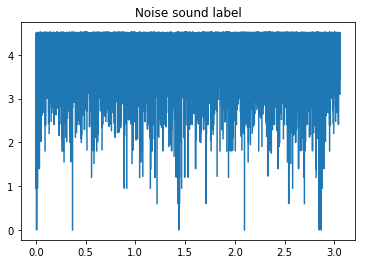

In [16]:
# computing noise sound level
nlevel = np.log10(Pnoise)
plt.plot(time, nlevel)
plt.title("Noise sound label")
plt.show()

Text(0.5, 1.0, 'Mixture Signal')

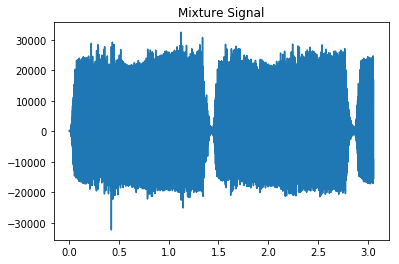

In [17]:
mixture = noise_params["signal"] + sample_params["signal"]
plt.plot(time, mixture)
plt.title("Mixture Signal")

In [52]:
import sounddevice as sd
sd.play(sample_params["signal"])

# import winsound

# winsound.PlaySound('speech_file_1', winsound.SND_FILENAME)

In [37]:
sd.play(noise_params["signal"])

In [38]:
sd.play(mixture)

In [21]:
time_vec = sample_params["time_vec"]
freq = sample_params["freq"]
nframes = sample_params["nframes"]
freqs = freq * np.linspace(0, nframes, num = nframes)

In [22]:
# speech
sig = sample_params["signal"]
fft_sig = np.fft.fft(sig)
mag_spec = np.abs(fft_sig)
mag_spec[2:-2] = 2 * mag_spec[2:-2]

In [23]:
# noise
ns = noise_params["signal"]
fft_ns = np.fft.fft(ns)
mag_spec_ns = np.abs(fft_ns)
mag_spec_ns[2:-2] = 2 * mag_spec_ns[2:-2]

In [24]:
# mixture
fft_mix = np.fft.fft(mixture)
mag_spec_mix = np.abs(fft_mix)
mag_spec_mix[2:-2] = 2 * mag_spec_mix[2:-2]

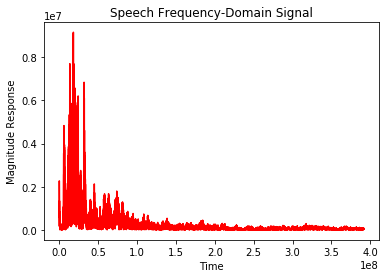

In [25]:
# speech sample
plt.plot(freqs[1:nframes//2], mag_spec[1:nframes//2], 'r')
plt.title('Speech Frequency-Domain Signal')
plt.xlabel('Time')
plt.ylabel('Magnitude Response')
plt.show()

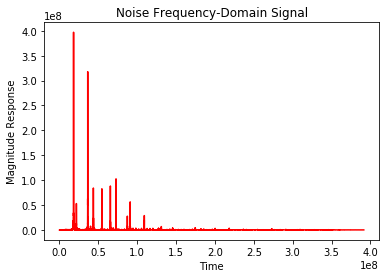

In [26]:
# noise sample
plt.plot(freqs[1:nframes//2], mag_spec_ns[1:nframes//2], 'r')
plt.title('Noise Frequency-Domain Signal')
plt.xlabel('Time')
plt.ylabel('Magnitude Response')
plt.show()

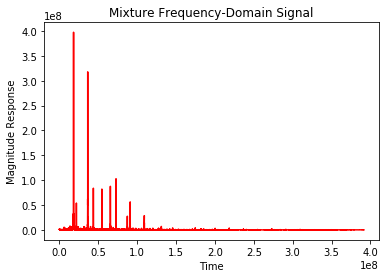

In [27]:
# mixture sample
plt.plot(freqs[1:nframes//2], mag_spec_mix[1:nframes//2], 'r')
plt.title('Mixture Frequency-Domain Signal')
plt.xlabel('Time')
plt.ylabel('Magnitude Response')
plt.show()

In [28]:
sp_energ = np.sum(E[1:] / time_vec[1:])
ns_energ = np.sum(Pnoise[1:] / time_vec[1:])
mix_energ = np.sum(mixture[1:]**2 / time_vec[1:])

print("Speech Energy:", sp_energ, "Noise Energy:", ns_energ)

Speech Energy: 2156490181.1914353 Noise Energy: 574805158.0533893


In [29]:
SNR = 10 * np.log10(sp_energ / ns_energ)
print("SNR:", SNR)

SNR: 5.7422682843061


In [30]:
lpf = (freqs < 1000000)

In [31]:
print(np.sum(lpf))

63


<function matplotlib.pyplot.show(*args, **kw)>

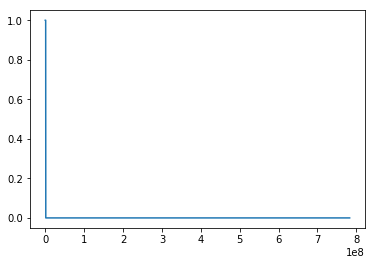

In [32]:
# LPF as function of frequency

plt.plot(freqs,lpf)
plt.show

Text(0.5, 1.0, 'Low-Pass Filtered Speech')

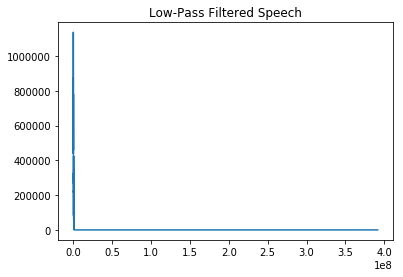

In [33]:
# LPF on Speech
s_fft_lpf = lpf.transpose() * fft_sig

plt.plot(freqs[1:nframes//2], np.abs(s_fft_lpf[1:nframes//2]))
plt.title("Low-Pass Filtered Speech")

Text(0.5, 1.0, 'Low-Pass Filtered Noise')

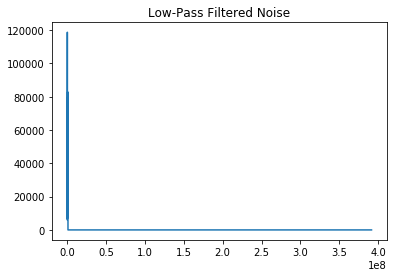

In [34]:
# LPF on Noise
ns_fft_lpf = lpf.transpose() * fft_ns

plt.plot(freqs[1:nframes//2], np.abs(ns_fft_lpf[1:nframes//2]))
plt.title("Low-Pass Filtered Noise")

TypeError: Unsupported data type: 'complex128'

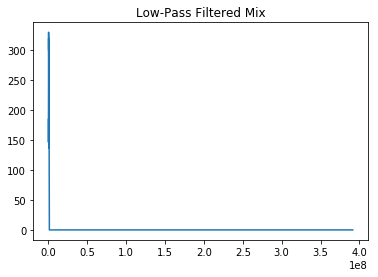

In [42]:
# LPF on Mix
ifft_mix = np.fft.ifft(fft_mix)
mix_fft_lpf = lpf.transpose()*ifft_mix

plt.plot(freqs[1:nframes//2], np.abs(mix_fft_lpf[1:nframes//2]))
plt.title("Low-Pass Filtered Mix")



# inv_fft = np.fft.ifft(mix_fft_lpf)

sd.play(mix_fft_lpf)